#### hmmlearn 패키지

In [1]:
from hmmlearn import hmm
np.random.seed(3)

model = hmm.GaussianHMM(n_components=2, covariance_type='diag')
model.startprob_ = np.array([0.9, 0.1])
model.transmat_ = np.array([[0.95, 0.05], [0.15, 0.85]])
model.means_ = np.array([[1.0], [-3.0]])
model.covars_ = np.array([[15.0], [40.0]])
X, Z = model.sample(500)

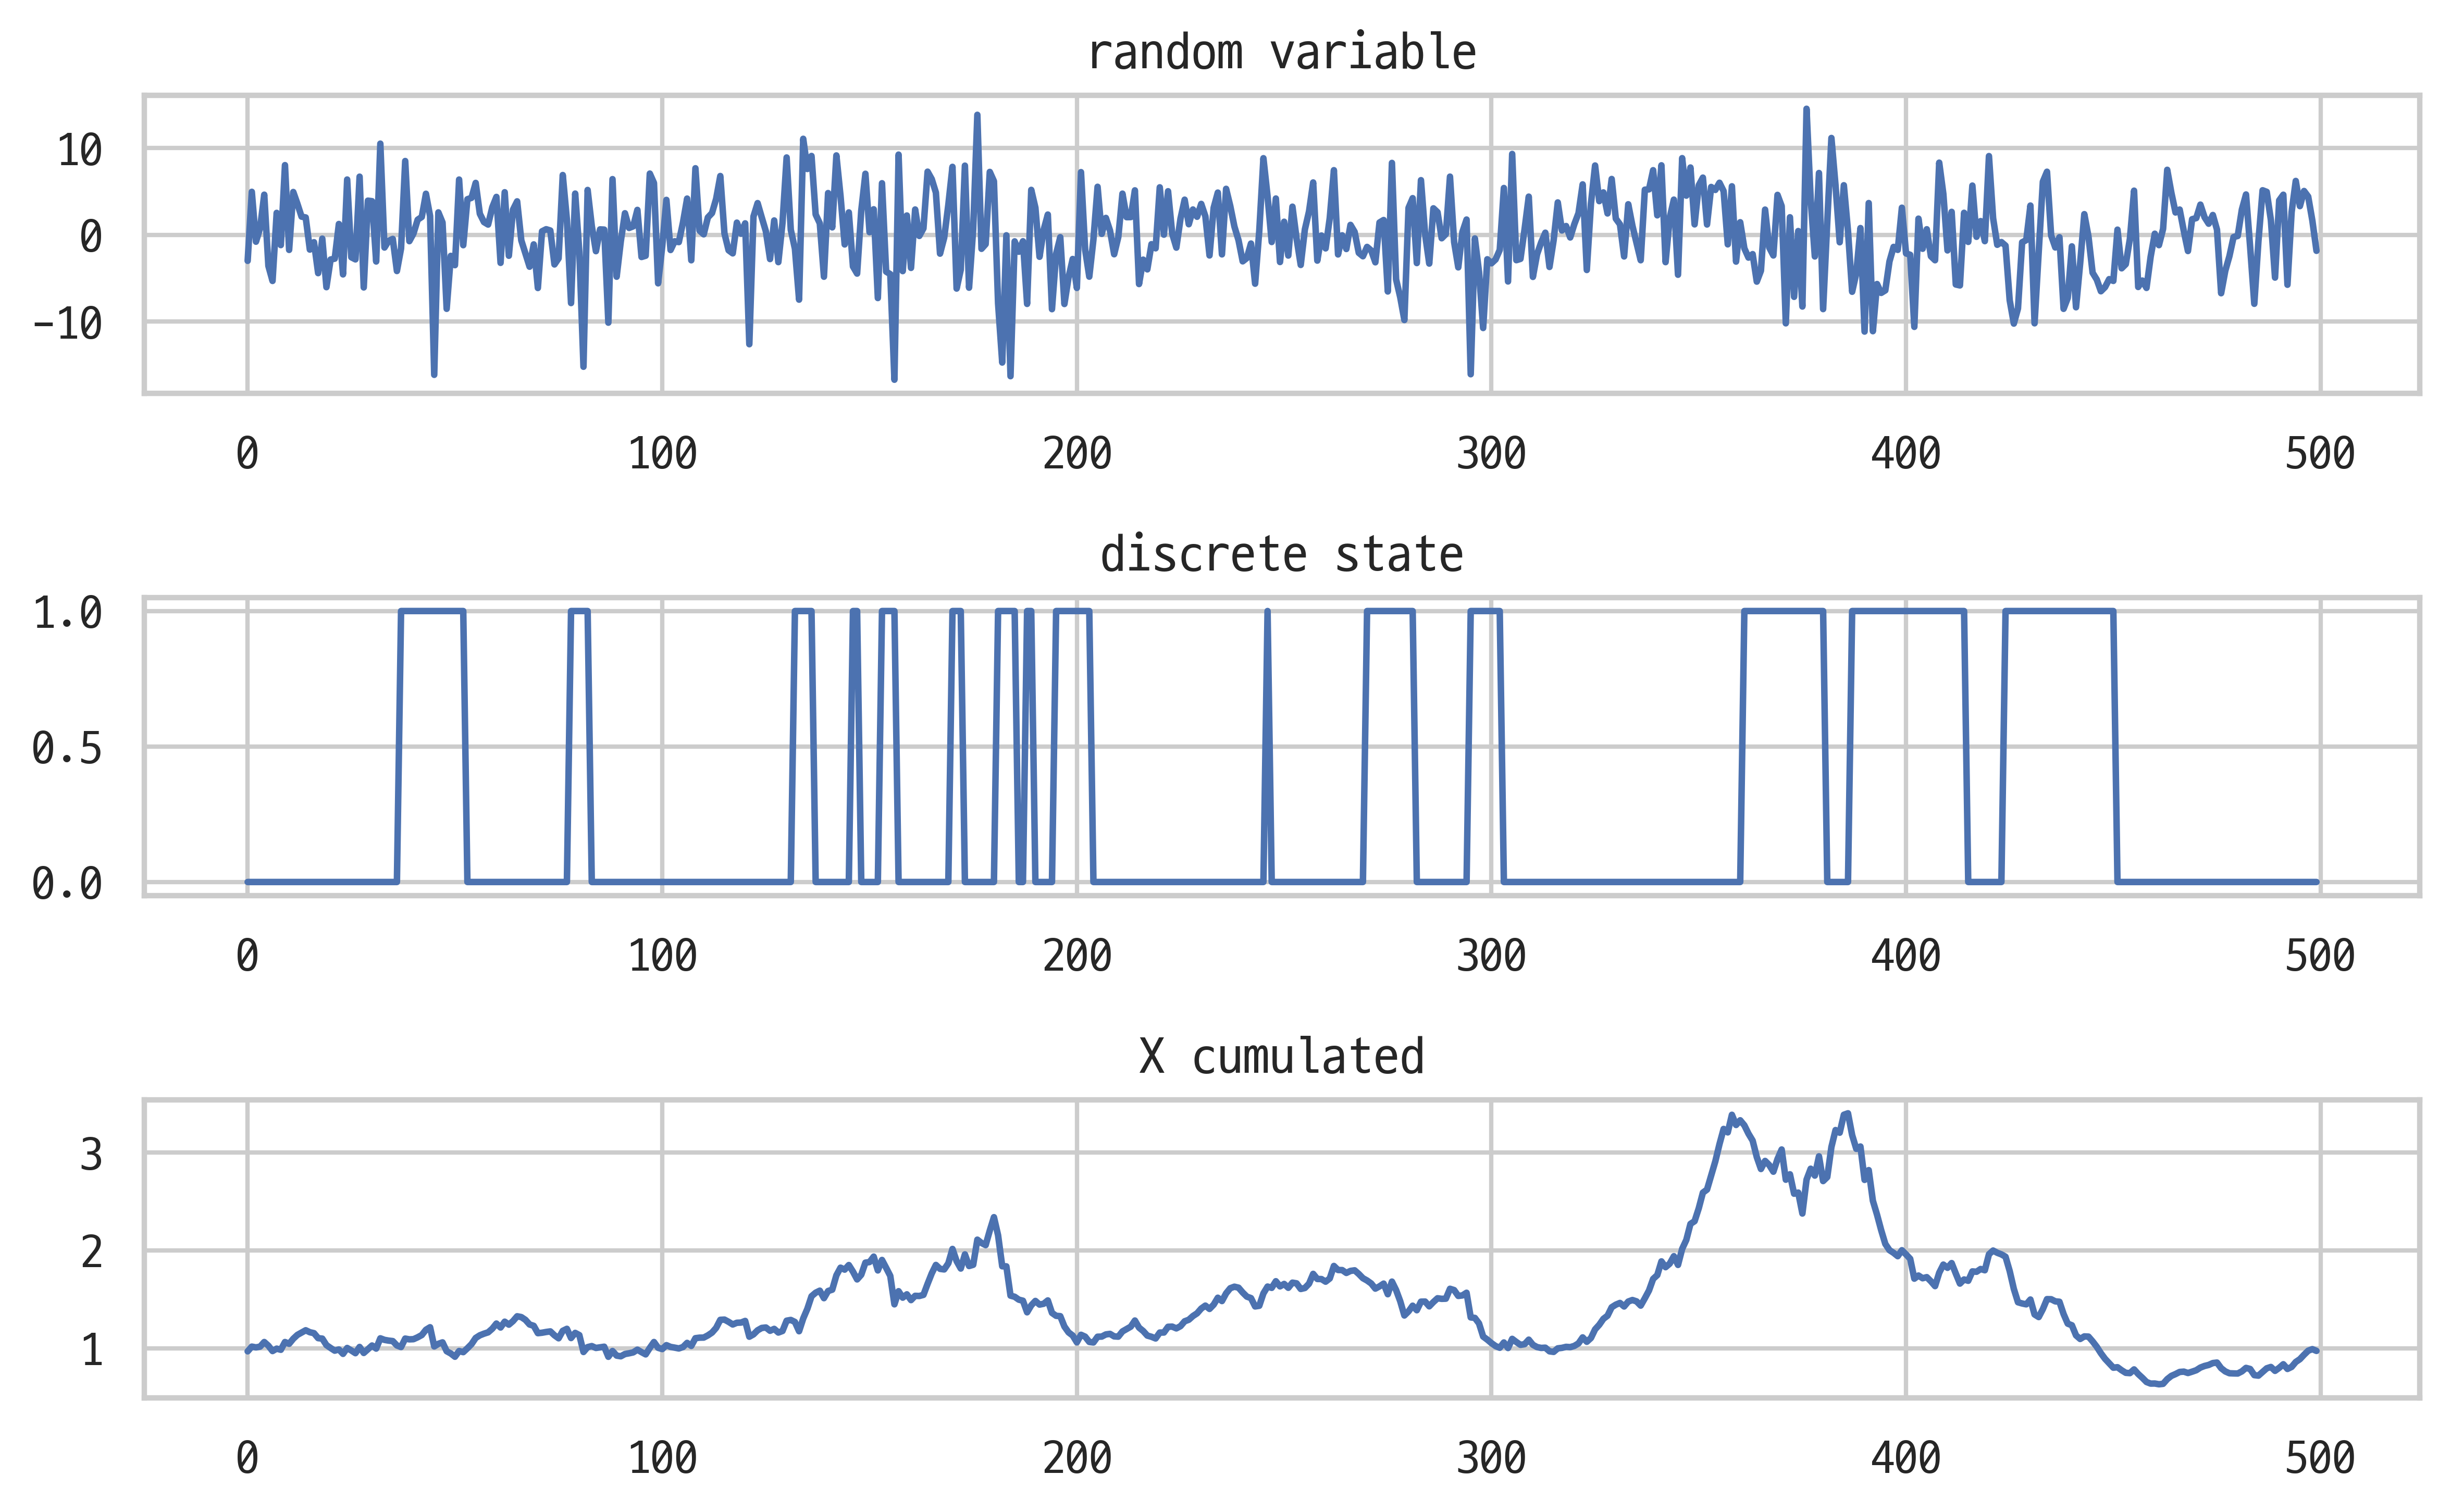

In [2]:
plt.subplot(311)
plt.plot(X)
plt.title('random variable')
plt.subplot(312)
plt.plot(Z)
plt.title('discrete state')
plt.subplot(313)
plt.plot((1 + 0.01*X).cumprod())
plt.title('X cumulated')
plt.tight_layout()
plt.show()

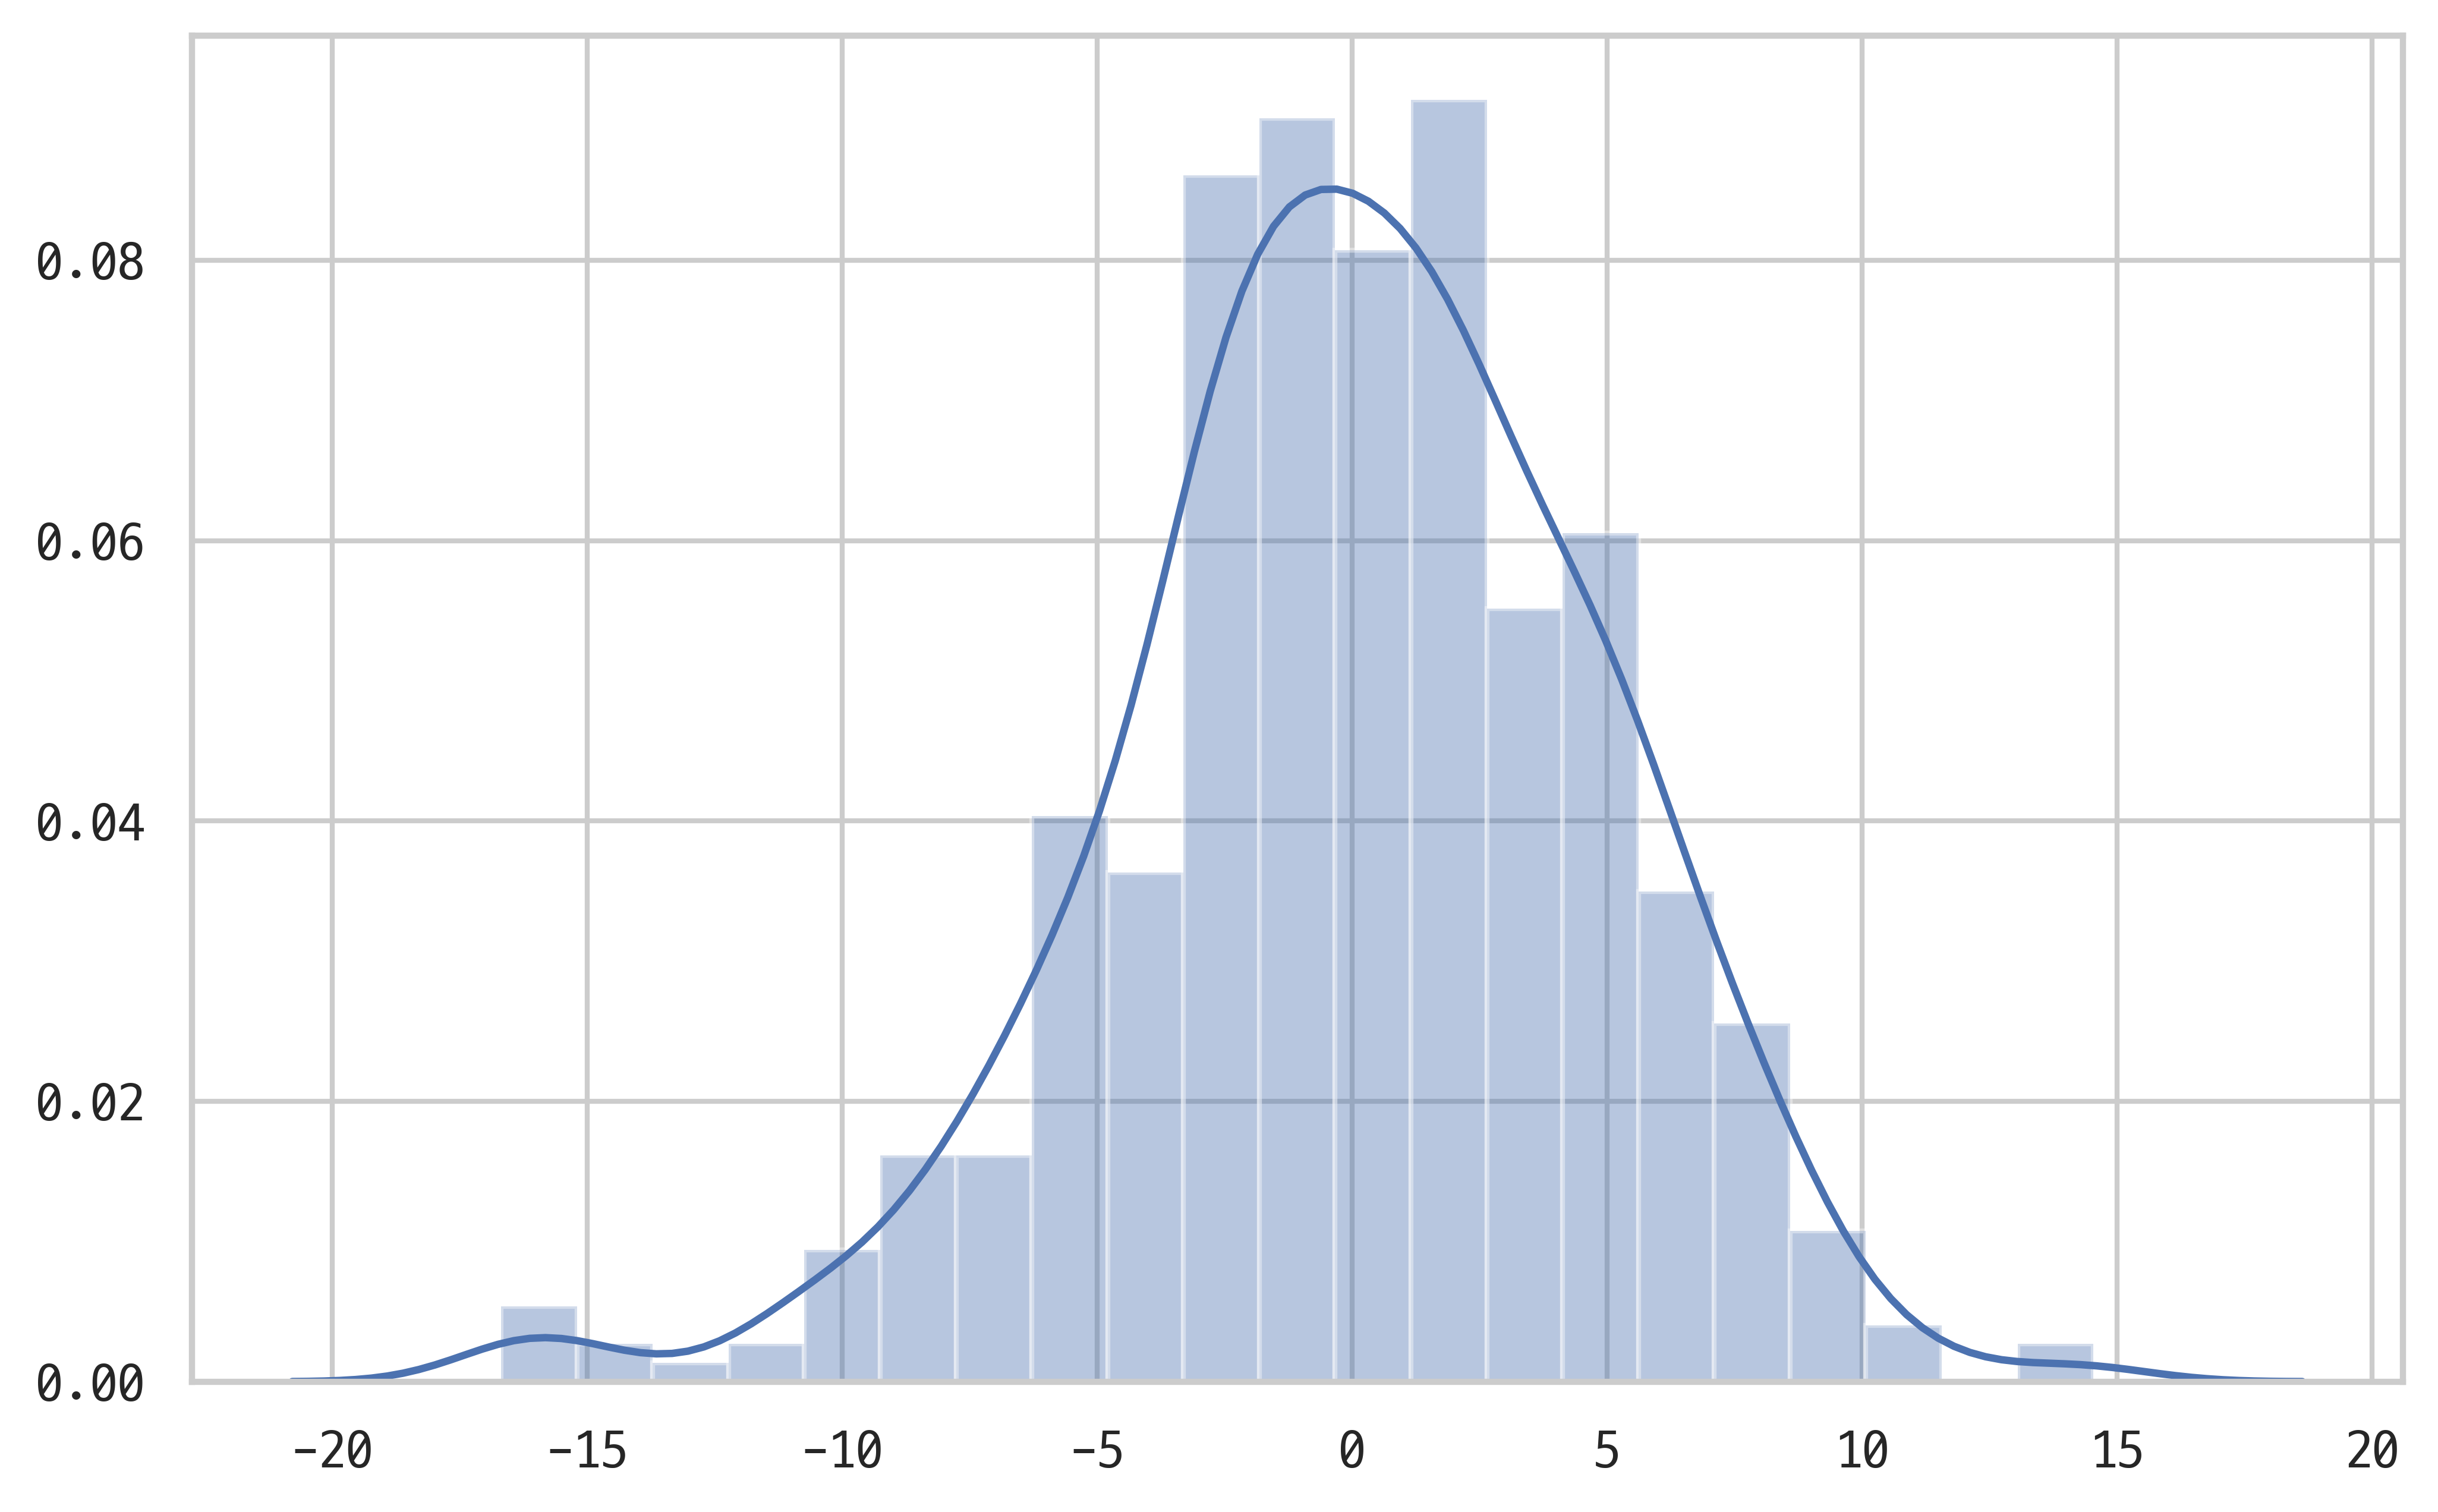

In [3]:
sns.distplot(X)
plt.show()

#### 디코드

In [4]:
model2 = hmm.GaussianHMM(n_components=2, n_iter=len(X)).fit(X)
model2

GaussianHMM(n_components=2, n_iter=500)

In [5]:
Z_hat = model2.decode(X)[1]
X_cum = (1+0.01*X).cumprod()
X_cum_hat = X_cum.copy()
X_cum_hat[Z_hat == 0] = np.nan

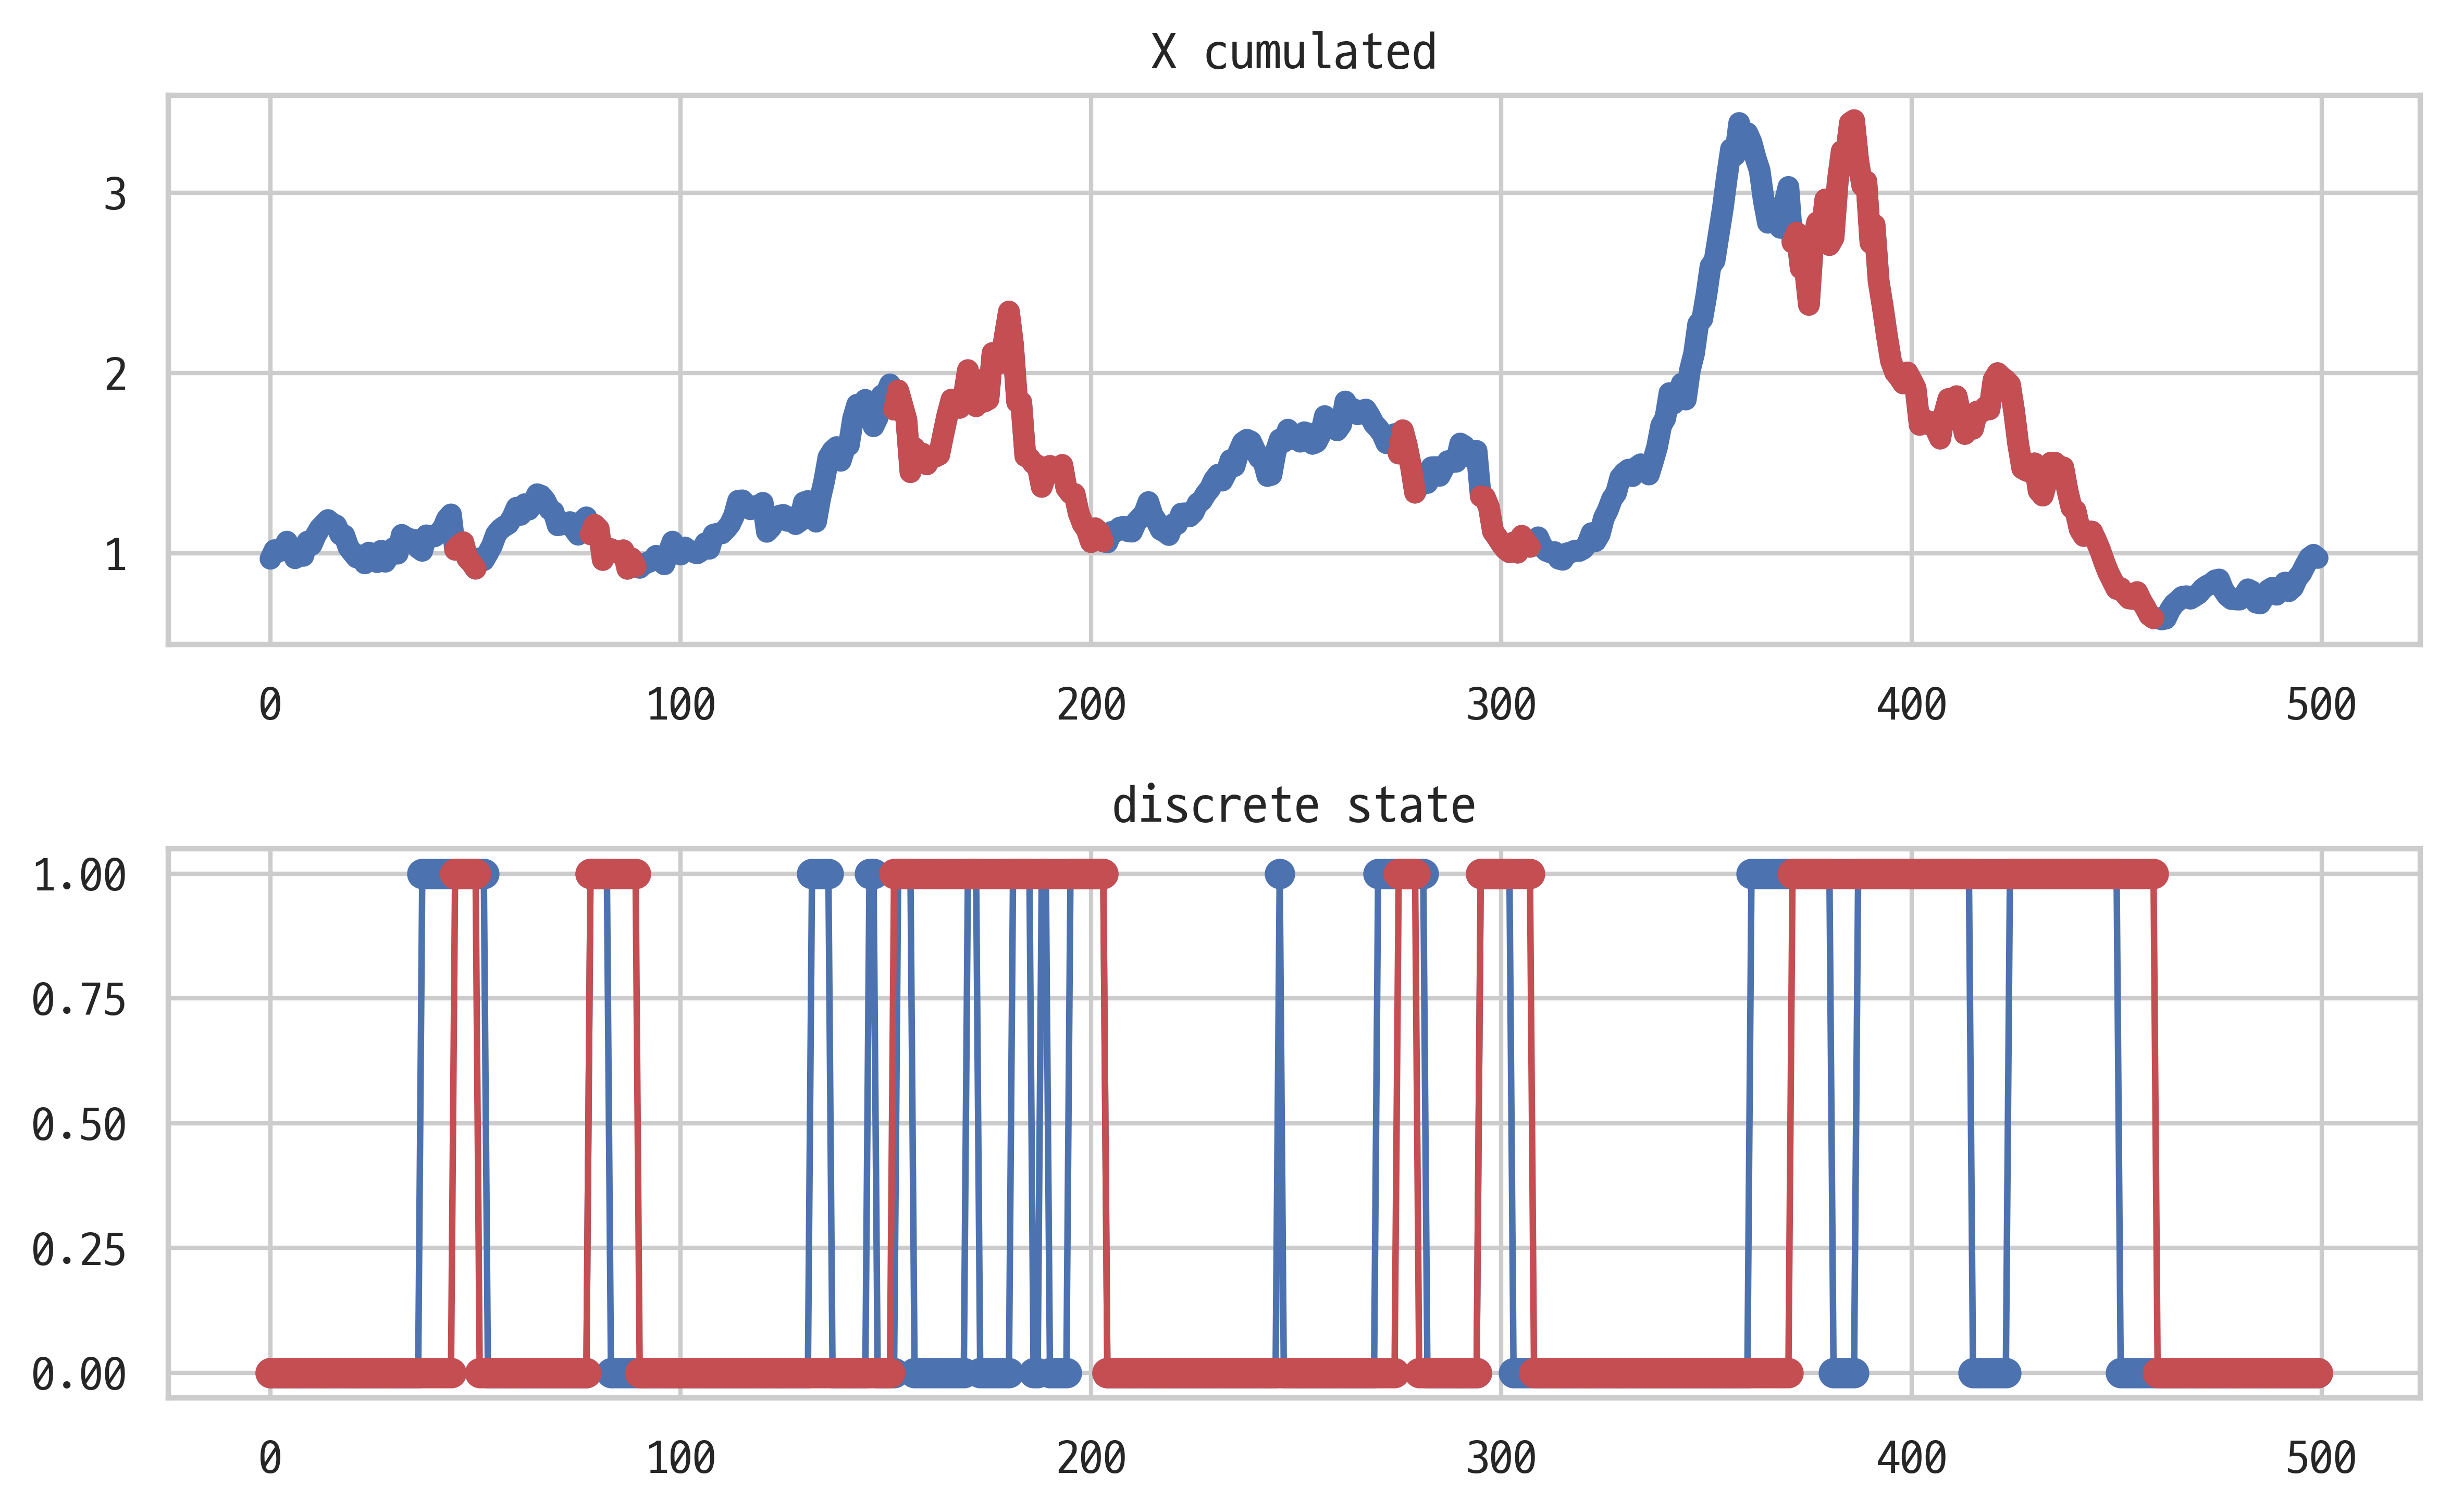

In [6]:
plt.subplot(211)
plt.plot(X_cum, lw=5)
plt.plot(X_cum_hat, 'r-', lw=5)
plt.title('X cumulated')
plt.subplot(212)
plt.plot(Z, 'bo-')
plt.plot(Z_hat, 'ro-')
plt.title('discrete state')
plt.tight_layout()
plt.show()